Use PCA to reduce the MNIST dataset to 2 dimensions and plot the result using a scatter plot with 10 different colors (1 per class).

Next, do the same with t-SNE (t-distributed Stochastic Neighbor Embedding).
Which visualization do you prefer in this case?

In [1]:
from sklearn import clone
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.utils import Bunch
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd

In [2]:
colors = ["green", "red", "blue", "purple", "yellow", "orange", "cyan", "slategrey", "chocolate", "lime"]

def plot(x, y, target, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)

    plt.scatter(
        x,
        y,
        c=target.astype(int),
        cmap=ListedColormap(colors),
        s=2
    )

    plt.show()

# plt.scatter(
#     X_transformed[0],
#     X_transformed[1],
#     c=[colors[int(i)] for i in y],
#     s=2
# )

# Load

In [3]:
b: Bunch = fetch_openml('mnist_784', parser="auto")

X = b.get("data")
y = b.get('target')

# PCA reduce MNIST

Use PCA to reduce the MNIST dataset to 2 dimensions and plot the result using a scatter plot with 10 different colors (1 per class).

In [4]:
pca = PCA(n_components=2, random_state=315)

In [5]:
pca.fit(X, y)

PCA(n_components=2, random_state=315)

In [6]:
X_transformed = pd.DataFrame(pca.transform(X))
X_transformed

,0,1
0,122.255703,-316.240098
1,1010.494362,-289.966710
2,-58.995820,393.702557
3,-796.964931,-607.428452
4,-391.318943,729.805400
...,...,...
69995,305.693741,-549.646958
69996,569.186269,-699.028097
69997,-271.506866,590.082935
69998,-310.225496,-116.720459


## Plot

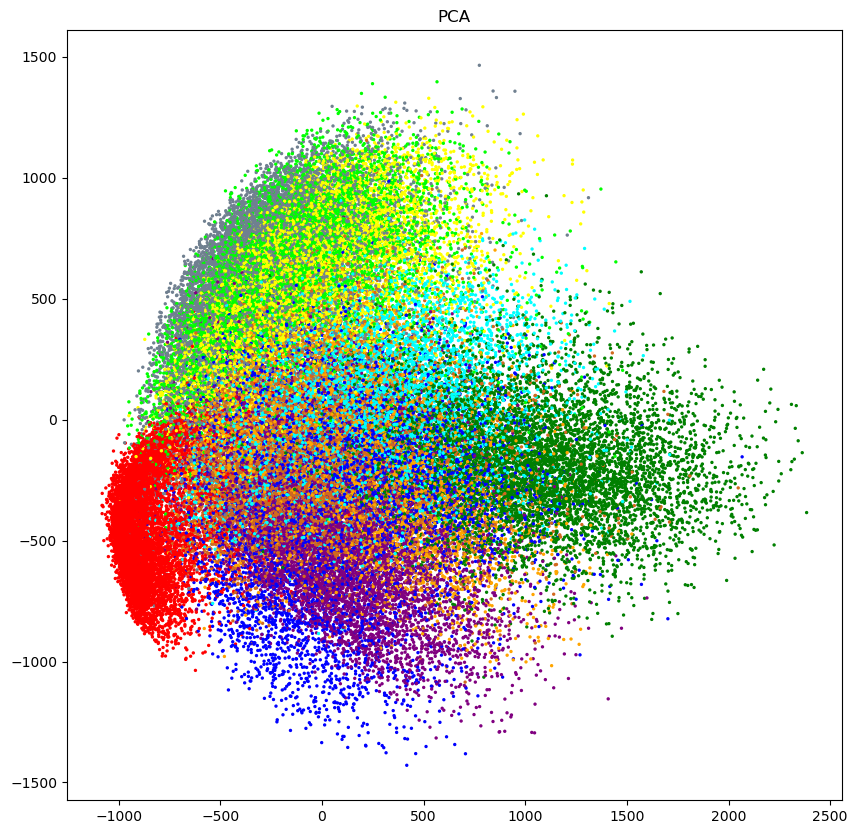

In [7]:
plot(X_transformed[0], X_transformed[1], y, "PCA")

# t-SNE

Next, do the same with t-SNE (t-distributed Stochastic Neighbor Embedding).

In [8]:
m = TSNE(verbose=2, n_jobs=-1)

## fit & transform

In [9]:
%%time
X_tsne = m.fit_transform(X, y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.066s...
[t-SNE] Computed neighbors for 70000 samples in 23.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for sa

## plot

In [10]:
X_tsne = pd.DataFrame(X_tsne)
X_tsne

,0,1
0,33.505592,-1.744631
1,68.942238,-38.018475
2,35.407646,85.500244
3,-63.244549,-46.812168
4,-14.565570,45.012318
...,...,...
69995,-18.981792,-52.132046
69996,35.786644,-54.637997
69997,13.341607,47.135780
69998,17.120644,22.754774


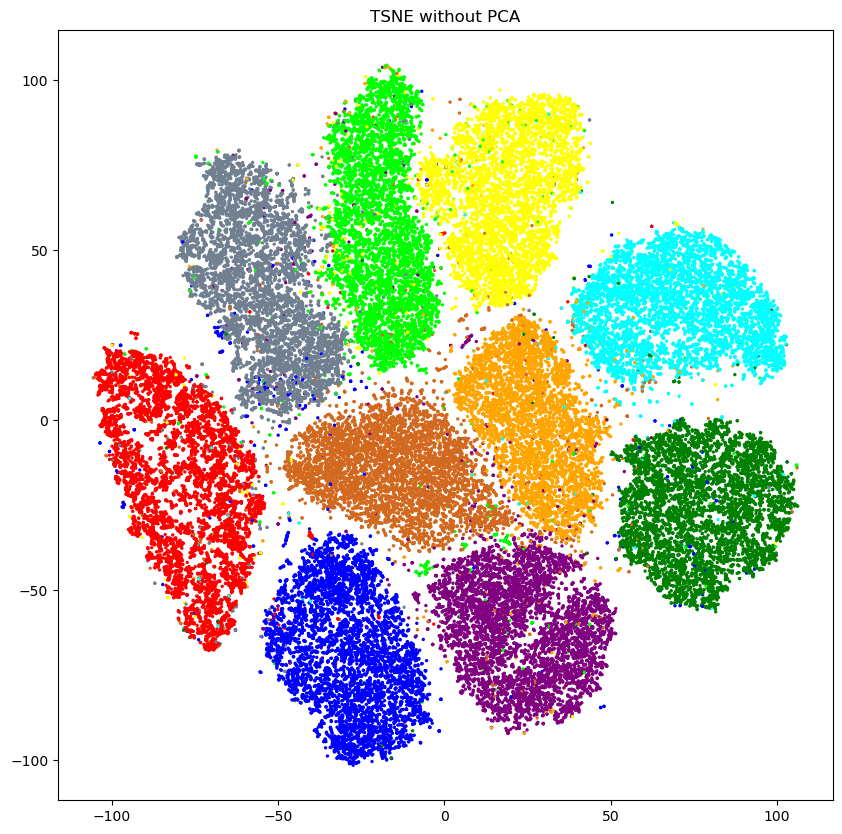

In [11]:
plot(X_tsne[0], X_tsne[1], y, "TSNE without PCA")

In [12]:
m_pca = clone(m)

In [13]:
%%time
X_tsne_pca = m_pca.fit_transform(X_transformed, y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.040s...
[t-SNE] Computed neighbors for 70000 samples in 0.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for sam

In [14]:
X_tsne_pca = pd.DataFrame(X_tsne_pca)
X_tsne_pca

,0,1
0,18.015633,-48.623646
1,109.600952,-37.220695
2,-2.741998,51.082867
3,-71.905075,-86.935974
4,-50.368889,108.980118
...,...,...
69995,43.654167,-81.660156
69996,67.988525,-87.719940
69997,-32.399796,82.976883
69998,-44.137589,-12.451661


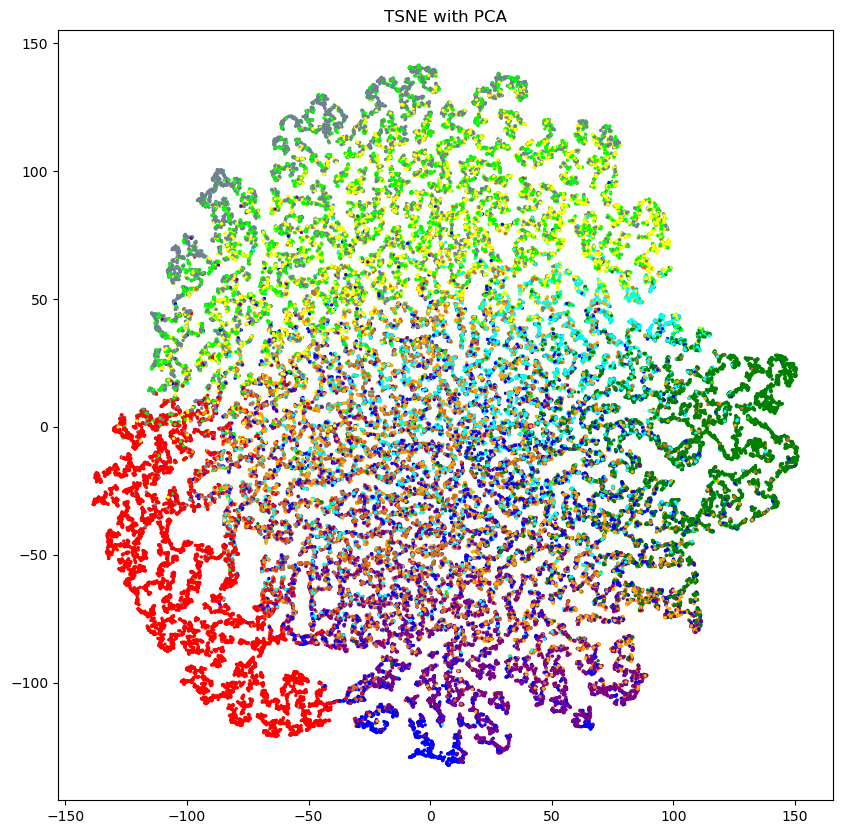

In [15]:
plot(X_tsne_pca[0], X_tsne_pca[1], y, "TSNE with PCA")

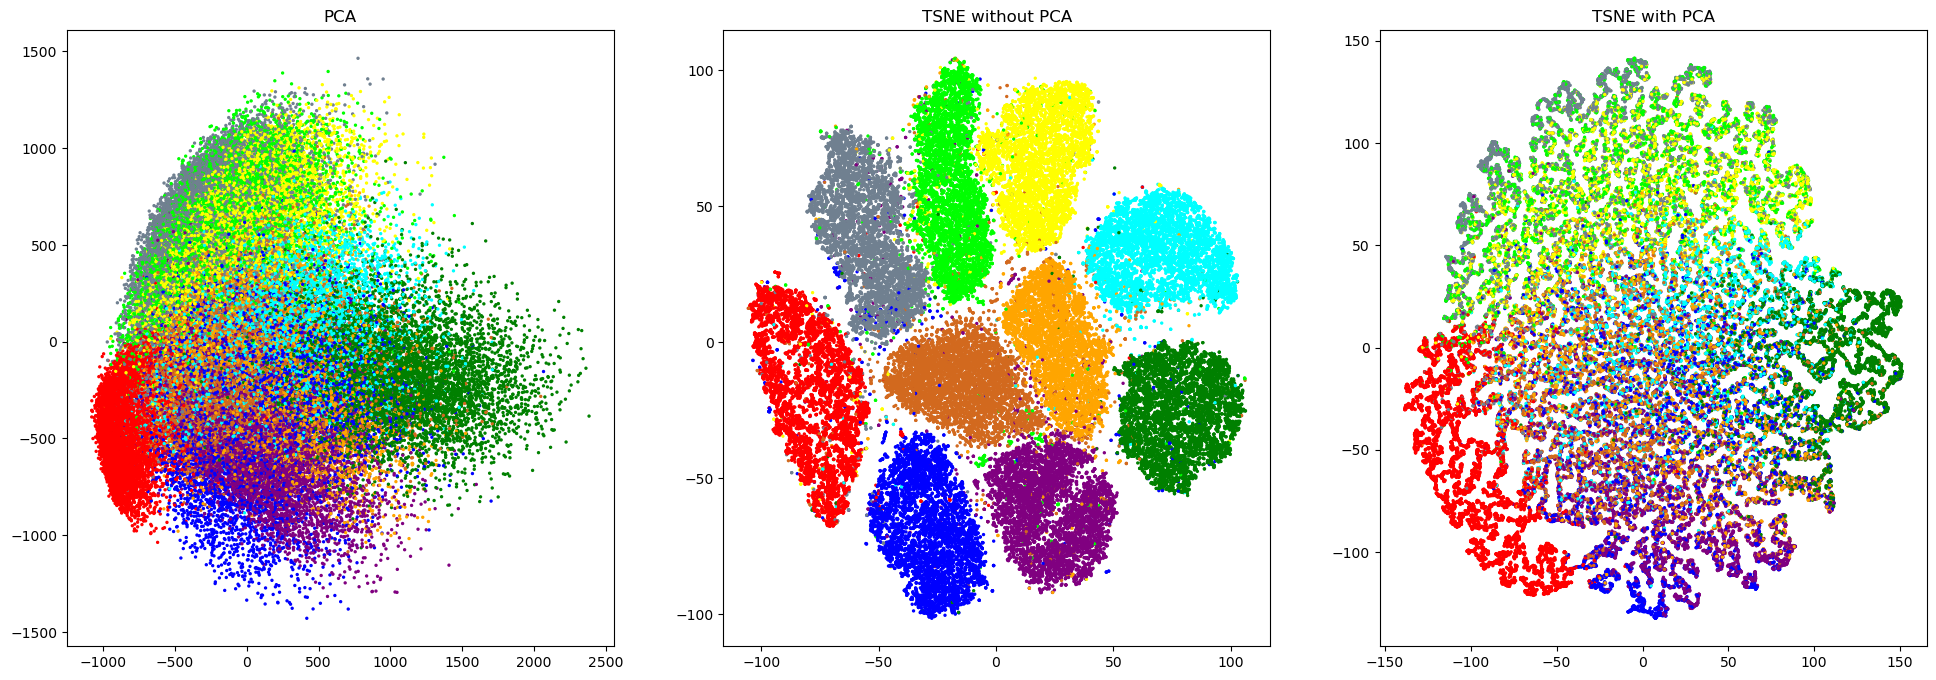

In [16]:
plt.figure(figsize=(8*3, 8))
plt.subplot(1,3,1)
plt.title("PCA")
plt.scatter(
    X_transformed[0],
    X_transformed[1],
    c=y.astype(int),
    cmap=ListedColormap(colors),
    s=2
)

plt.subplot(1,3,2)
plt.title("TSNE without PCA")
plt.scatter(
    X_tsne[0],
    X_tsne[1],
    c=y.astype(int),
    cmap=ListedColormap(colors),
    s=2
)

plt.subplot(1,3,3)
plt.title("TSNE with PCA")
plt.scatter(
    X_tsne_pca[0],
    X_tsne_pca[1],
    c=y.astype(int),
    cmap=ListedColormap(colors),
    s=2
)
